<a href="https://colab.research.google.com/github/galmerom/FastImageRecognition/blob/master/Fast_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Developed by: **Gal Merom**


This notebook provides an easy environment to create a deep learning network that can find a **specific object in images and videos**. The idea is to look for a specific object in a video or images.



**For example:**

 Suppose we are looking for a specific dog. We want the algorithm to tell us that a specific dog is in the picture and not just "a dog."
 


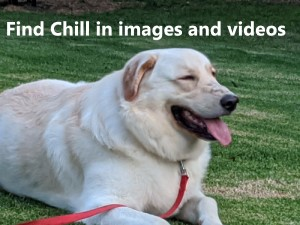

## The challenge
To train a deep learning network from scratch to find a specific object (like the dog Chill), it will take: 

*   **Data**  - A lot of data
*   **Training time** - A lot of training time, usually with a lot of GPU
*   **Coding skills** - For every project you write, you need to understand a lot of code and understand the embedding of open source.


##Solution architecture
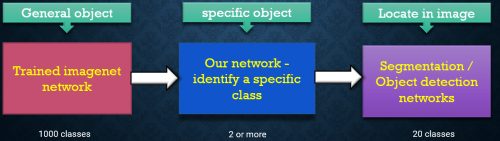
###**The architecture:**
*   Take a first imagnet trained network (rsenet50) that will look for a type of object (in the dog's example, this network will look for a general dog in the image).
*    **If** the general type object was found, search for a specific object (If a dog was found in the first step **then** search for the specific dog).
*    If we passed the 2 steps and we know that the specific object is in the image, then find it in the image by using object detection or segmentation

##**This notebook solution**
This is a pipeline that in a short time can create networks that will find the specific object. **The main features:**

*   **Already made pipeline for your project** - Only basic code skills are necessary. You will need to understand what you are doing, but you will need almost no coding.
*   **Get data from videos** - Take videos of the specific objects and easily transfer them to a training and test dataset made of images. Due to layers architecture, find non-target images only for the specific type of object. (In the dog example: The target images can be retrieved from a few videos taken of the specific dog). 
* **Training time** - Since we don't need to find a specific object out of all the objects in the world. The task gets much simpler and therefore uses a lot less training time. In the dog example, we need to train the network to distinguish between general dogs and the specific dog (Chill). *We don't need* to distinct between Chill and cars or chairs.










#**Comprehensive toolset**

This notebook includes the following tools:
###**Easy building of datasets:**

1.   **Convert videos to frames** - A tool that converts a video to an image and, after picking the right images, transfers the data to the training set.
2.   **Augmented training dataset** - Each training image gets augmented so 100 images can become 1000 images. The code is already embedded in the modules. The user can change the parameters of the augmentation. Easy select, if you want to save the augmented images
3. **Automatic create 3 datasets** - Training, Validation, and test
4. **Auto labeling by directory** - No need for creating a labeled target array. It will be formed automatically from the directory's names. For example, if I have 2 classes: 0='Chill', 1='Other dogs', then form the directories (see below) to put the images in directories: 'Chill' and 'Other dogs'. And when reading the images, it will create the 'Y true labels' from the directories' name.

###**Easy building of network:**


1.   **Easy selection of optimizers** - Choose predefined optimizers or create your own. Predefined optimizers have predefined parameters that you can change.
2.   **Easy select "changing learning rates" objects** - Choose predefined changing learning rates objects with predefined parameters or change the parameters or add different learning rates object
3. **Auto-create deep learning networks** - The 2 deep learning networks are created automatically. You can easily change the loss function and the metrics.
4. **Auto balancing of classes** - Model gets a dictionary that by default balances the classes by applying weights to the model. The balance is done automatically, so if you add more data, the weights will be recalculated. Of course, if you want to change the balanced weights, you can easily do it by applying the ratio you want. 

###**Test augmentation and Results analysis**


1.   **Test augmentation** - Use build-in test augmentation that takes every image and creates x augmented images out of it. Then takes the best-predicted class. It runs on the Test dataset only!
2.   **Graphical confusion matrix** - Get a graphical confusion matrix to explore where your model can do better.
3.   **Classification report** - Get a classification report to explore where your model can do better.
4.   **Wrongly predicted images tool** - Get easy to use tool that shows you all the images that were not predicted right. Above each image, you will see the predicted class and the actual class

###**Easy to use user interface**


1.   **A well explained how to define your project**. How to define your classes and your target class.
2.   **Automatic creating directory tool** - Enter your main path. The code will open the relevant paths for the project (about 20 of them) and put all of the paths in an easy-to-use dictionary. You can use this dictionary for the code you want to write. The different attached modules find the right place to read and write without sending them specific paths.

###**Manage your model**

1.   **Autosave** the best weights every epoch runs when it gets a better result in the validation set.
2.   **Use load/save model or load save weights** - Saving model keeps the whole network, including the weights, and it takes much more time than saving and loading only the weights.



# **Output**


1.   **Directory sorting tool** - Go over a directory and sort images/videos to classes  directories. Also available to add boxes around the object (object detection) or color the object using segmentation.
2.   **Individual sorting tool** - Enter one image and using object detection or segmentation you can see the object in the image or the video



# **Output examples**
The following 2 links demonstrate the **object detection** and the **segmenation** in this project.

[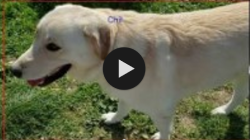](https://www.youtube.com/watch?v=ZS6XEXYPJmw "Object detection")                  [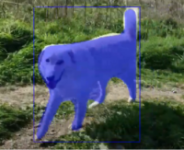](https://www.youtube.com/watch?v=RT5gIsOOkwM "Segmenation")



---



# Initialize

## Attach drive

Attach a google drive or any other local drive so your "Main path" will work

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Imports

### Import pixellib
If pixellib is not imported then use the following to get it

In [2]:
!pip install pixellib

     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-cp37-none-any.whl size=16033 sha256=87c39b731d92adcd6aa7b63d9bfd4b4b877ff39401bb3a244c3b0c03058f400b
  Stored in directory: /root/.cache/pip/wheels/73/93/1c/9e2fc52eb74441941bc76cac441ddcc2c7ad67b18e1849e62a
Successfully built imantics


### Get the project modules from github

In [43]:
import shutil
import sys

shutil.rmtree('FastImageRecognition',ignore_errors=True)

!git clone https://github.com/galmerom/FastImageRecognition.git
SourceCodePath2 = 'FastImageRecognition'
sys.path.insert(1, SourceCodePath2 )


Cloning into 'FastImageRecognition'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10365 (delta 2), reused 6 (delta 2), pack-reused 10359
Receiving objects: 100% (10365/10365), 84.79 MiB | 25.81 MiB/s, done.
Resolving deltas: 100% (2550/2550), done.
Checking out files: 100% (11944/11944), done.


### import libraries

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import buildspecificmodel as SpcModel
import buildtrainandtestdata as Dataset
import detectinvideo as Videct
import directoryandclass as Dircls
import testaugmandrsltexplor as Ttax
import find_object as fndobj

## Parameters

This parameter is important. Enter the main path where you want the project to be

In [5]:
Your_Main_Path = '/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A'

 If you are not changing the basic network, then don't change the image height and width. You can change the Batch size, which is the number of images the deep learning network uses at one time.

In [6]:
ParamDic = {
    'IMAGE_HEIGHT': 224,
    'IMAGE_WIDTH' : 224,
    'BatchSize' : 32
    }

The following line of code pack some of the parameters to easy use ahead. Please don't change it

In [7]:
imgShape = (ParamDic['IMAGE_HEIGHT'],ParamDic['IMAGE_WIDTH'],3)

# What to look for?
The input for the model

To define the project, we need 3 main parameters:

*   **Main class**: The main subject that we are looking for.
*   **Imagenet classes**: The classes used by imagnet that might contain the Main class
*   **Specific classes**: The classes this project will search for


Example: Suppose we are looking for a dog called Lassie:


*   The Main class will be: dog
*   The Imagenet classes will be all classes from 151 to 263
*   The Specific classes will be: ['Lassie', 'Other dogs'] 
*   We always add a default class for all the others. In this case, 'Other dogs'

### **Main class**


*    If you **don't need** segmenation in this project, then you can enter any string you want.
*    if you **need** video segmentation, then you must choose from the following classes:

*     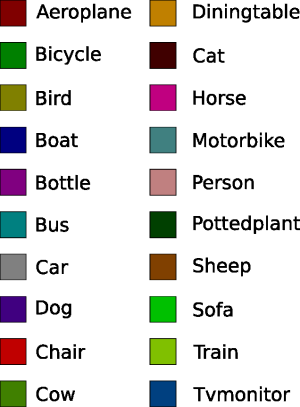






And for easy copying, here are the same classes in a text list:

*   person, bus, car, aeroplane, bicycle, motorbike,bird, boat, bottle, cat, chair, cow, dinningtable, dog, horse, pottedplant, sheep, sofa, train, tv



In [33]:
MainClass='dog'

### **Imagenet classes**

There are 1000 classes available in imagnet. You can see the list of classes by running the following code:

In [9]:
ImgNetClass = Dircls.GetImagenetClasses()
ImgNetClass

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

There are 2 options to pick classes:


*   Option = 1: Send a **list** of specific classes. 
*   Option = 2: Send a list of tuples that every tuple: (start from this class, Until this class). The result will be a list of all the classes that are between the 2 parameters



In [10]:
ImagNetClasses = Dircls.LstRelevImagnetClasses(2,[(151,268)])

### **specific classes**
Enter the specific classes that you are looking for

Enter here the classes you want the model to recognize. Always add "other" class. 

In [11]:
ClassesInModel = ['Chil','Other dogs']

### Open all paths

The following code will create all the relevant paths that you need deriving from your main path. All the paths will be in the "paths" dictionary for later use by the modules or you. If the directories already exist, then it will do nothing to them.

##### To see the list of each path and its Designation: 

**Main** - This is the main path that the user entered

**Batch input images**: Put a directory full of **images** here so the algorithm can sort it by classes

**Video input**: Put a directory full of **videos** here so the algorithm can sort it by classes
**train_dataset**: This directory should contain the *training set* divided into directories by classes (every class in a different directory) 

**test_dataset**:  This directory should contain the *test set* divided into directories by classes (every class in a different directory)

**augmented pictures**: If you choose to save the training augmentation images, you will find them here.

**save model and weights**: Here, you will find 2 directories: **Saved weights** to save the model weights and **Saved model** where the entire model is saved.

**Video for training data**: If the user chooses to run an extraction of images from a video, he should put the input videos in this directory.

**VideoTrainFrames**: This is where the output extracted frames will be until the user deletes the images he doesn't want to enter the training dataset

**Video extracted frames** This is a directory that holds the extracted images from videos at the running stage. Unlike the VideoTrainFrames directory, this directory is part of the output process and **not** the building of a training dataset.

**Output**: This is the directory where you will get the sorted images or videos.

**Other internal directories**: the output/test_dataset/train_dataset contains internal directories with the name of the user-defined classes. Some of the internal directories will be used in later versions.

####Creating the path dictionary

In [12]:
DirDic = Dircls.CreateProjectDirectories(Your_Main_Path,ClassesInModel,MainClass)
paths = Dircls.createDirectories(DirDic)

/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/train_dataset
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/test_dataset
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/save model and weights
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/augmented pictures
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Video input
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Video extracted frames
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Output
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Video for training data
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/temp dir
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Batch input images
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Video for training data
/gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/Video for training data/VideoTrainFrames
/gdrive/My Drive/Colab Notebook

# Build the train and test datasets

Building a **train dataset**:

1. Add pictures to the relevant directories
2. If you need more images, you can use a tool that will convert from video to images
3. Define and build the augmentation generator that will improve the training of the model
4. Adjust the class weights for the model

Building the **test dataset**:

1. Add pictures to the relevant directories
2. Define the **test time** augmentation




## Building a **train** dataset

### **1 Add images to the train_dataset directory**:
*   Every specific class should be in a different directory.   
*   The algorithm will use the name of the directory as the label 
* Relevant directories are already there.You can find them at: **Your_Main_Path/train_dataset/**
* Load the images that you have.
*  If you don't have enough images take a video of the object and then use the provided tool to convert the video to images and add them to the training set.




#### **2. Convert videos to frames and add them to the training set**

In case there are not enough images from the desired subject, use the video extractor to create images for the training set.
Upload any number of videos to the input directory below and run the following code. The code will extract frames from the video every X frames and put them all in the output directory: 

*   Input directory: **Your_Main_Path/Video for training data**
*   Output directory: **Your_Main_Path/Video for training data/VideoTrainFrames**




In [13]:
# Videct.UseDirectory2CrtTrainFrames(paths['Video for training data'],paths['VideoTrainFrames'])


*   Go to directoy: **Your_Main_Path/Video for training data/VideoTrainFrames**
*   Remove images you don't like
*   Then run the following code that will copy the images to the training set
*   The code assume that the images you left in the directory is of the subject you want to train this model on



In [14]:
# ChosenClass=input('Please enter the name of the class those images belong to. Available classes:\n'+ str(ClassesInModel))
# Videct.CopyExtractFrames2TrainDir(paths['VideoTrainFrames'],paths[ChosenClass])

### **3. Define and build the augmenation generator**

#### **Define generator for test and validation**
Change the default setting to get your desired generator. You can find more info [here](https://keras.io/api/preprocessing/image/#imagedatagenerator-class).

Use the **validation_split** parameter to change the size of the validation generator.

In [15]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.15)

In [16]:
test_datagen = ImageDataGenerator(preprocessing_function=Dataset.preproc)

#### **Build training generator and validation generator**
* Notice that the validation generator is not like the test generator.
* The validation runs after each epoch with untrained data.
* At the beginning, both **train** and **validation** generators take the images from the same pool randomly.
* The **test** generator takes from a different pool of images so leakage can occur.

Create 3 image generators: Train, validation, test

Create 3 corresponding STEP_SIZE parameters for each generator


In [17]:
Generators,StepSizes = Dataset.CrtTrainValidAndTestGenerators(datagen,test_datagen,paths,ParamDic)

train_generator,valid_generator,test_generator = Generators
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_Test = StepSizes

Found 2772 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 618 images belonging to 2 classes.


### If needed, use the following code to see the augmentation photo at the following directory:

**your main path / augmented pictures**

In [18]:
# Generators,StepSizes = Dataset.CrtTrainValidAndTestGenrators(datagen,test_datagen,paths,ParamDic,Path2AugmentImg = True)

# train_generator,valid_generator,test_generator = Generators
# STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_Test = StepSizes

## Find weights

To balance the data in the **training dataset**, we use the following function.

 We can add a dictionary with extra weights for each class (that means that a specific class will get more weights than the others)

An example for such dictionary will be:

 dic={0:1.2,1:1}

 That means that after balancing the weights according to the data proportion, we will add an extra 20% to class 0

In [19]:
WeightsDic = SpcModel.FindWeights(train_generator)

Num of pictures in each class:Counter({1: 2594, 0: 178})
Weights:{0: 15.573033707865168, 1: 1.0686198920585968}


# Build the network model

To build the network, we need to define the following:

*   **Optimizer** - which optimizer to use, and what are the hyper-parameters
*   **Changing learning rate -** choose from available learning rates or construct your own. This is not mandatory, and defaults are available.



## **Changing learning rate**

First, let's choose a changing learning rate (this is not mandatory, you can you the defaults). The following learning rate is available:


*   **CosineDecay**
*   **CosineDecayRestarts**
*   **LinearCosineDecay**
*   You can define **your own** learning rate. Make sure it works with the optimizer and Keras



*   If you want to change hyperparameters, use a dictionary.
*   Any parameter that is not in the dictionary will get a default value



In [20]:
LR_dic = {'initial_learning_rate':0.0001, 'decay_steps' : 40, 'alpha':0.2}
lr_decayed = SpcModel.PickLearnRateDecay('CosineDecay')

## **Optimizers**

Choose from the following optimizers or create your own:


*   **adam** -  a combination of RMSprop and Stochastic Gradient Descent with momentum.
*   **Nadam** - just like adam, but the momentum also get a direction
*   **Adamax** - It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, especially in models with embeddings. 
*   **SGD** - Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties




*   If you want to change hyperparameters, use a dictionary.
*   Any parameter that is not in the dictionary will get a default value
* **Notice that Nadam and Adamax does not support changing learning rates**

**In case we used a changing learning rate, we must include the dictionary**

In [21]:
OptDic = {'learning_rate':lr_decayed}
opt = SpcModel.PickOptimizer('adam',OptDic)

## **Build the network model**

This is the main model that we use. We will train this model.

In [22]:
model = SpcModel.CreateSpecificModel(opt,ImageShape=imgShape)

94773248/94765736 [==============================] - 1s 0us/step


Adding another network model that will be used later for predicting the main type of object

In [23]:
Firstmodel = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


### Create a checkpoint

The checkpoint is used to tell the model that, during training, we want the weights to be saved at a specific directory and what frequency.

In [24]:
cp_callback = ModelCheckpoint(filepath=paths['Saved weights'],
                              verbose=1, 
                              save_weights_only=True,
                              save_freq='epoch',
                              save_best_only=True)

The summary  shows the full network

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Load and save model and weights

**Load weights only**

The best epoch run is saved automatically to the drive. To use those weights, load them to the model (after that, there is no need to run the fit section unless you try to improve the model)

In [ ]:
model.load_weights(paths['Saved weights'])

**notice** - when you load the weights, there is no change in the optimizer or the changing learning rate

**Load model and weights**

In case there is a saved model available (that includes the network, the optimizer, the changing learning rate, and of course, the **weights**)

The save command line is after the fit section. Use it when you get a good result.

In [28]:
model = load_model(paths['Saved model'])

# Fit model

Use the fit method to train the model.

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=1,
        validation_data=valid_generator,
        validation_steps=STEP_SIZE_VALID,
        class_weight = WeightsDic,
        verbose=1,
        callbacks=[cp_callback])

## Save the model

If you got a good model, then save the network+weights

In [ ]:
# model.save(paths['Saved model'])

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/Projects/Testing/Test A/save model and weights/Saved model/assets


# Evaluate the test dataset

## Find test dataset accuracy

This is the first time we use the test dataset. Let's see the accuracy of the model:

In [29]:
model.evaluate(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.19662263300269842, 0.9255663]

## Result exploration

We define the image generator that will be used for creating the augmented test images.

Change the parameters according to your data.

In [30]:
# configure image data augmentation
TTAugmentation = ImageDataGenerator(width_shift_range=0.08,height_shift_range=0.08,horizontal_flip=True,zoom_range=0.08,brightness_range=[0.9,1.3])

### Test time augmenation  + data exploration

Use test time augmentation to improve prediction. The following code will do the following:
1. Test time augmentation prediction.
2. Show the confusion matrix.
3. Show the classification report.
4. Show images that the prediction and actual classes are not the same.  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


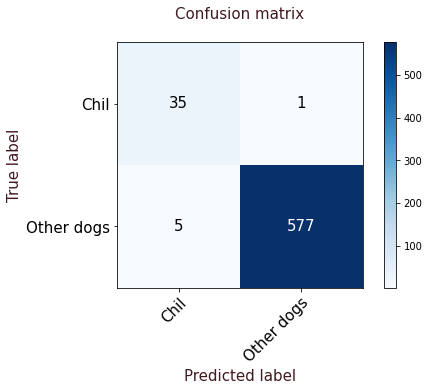



Classification_report
*********************

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       1.00      0.99      0.99       582

    accuracy                           0.99       618
   macro avg       0.94      0.98      0.96       618
weighted avg       0.99      0.99      0.99       618



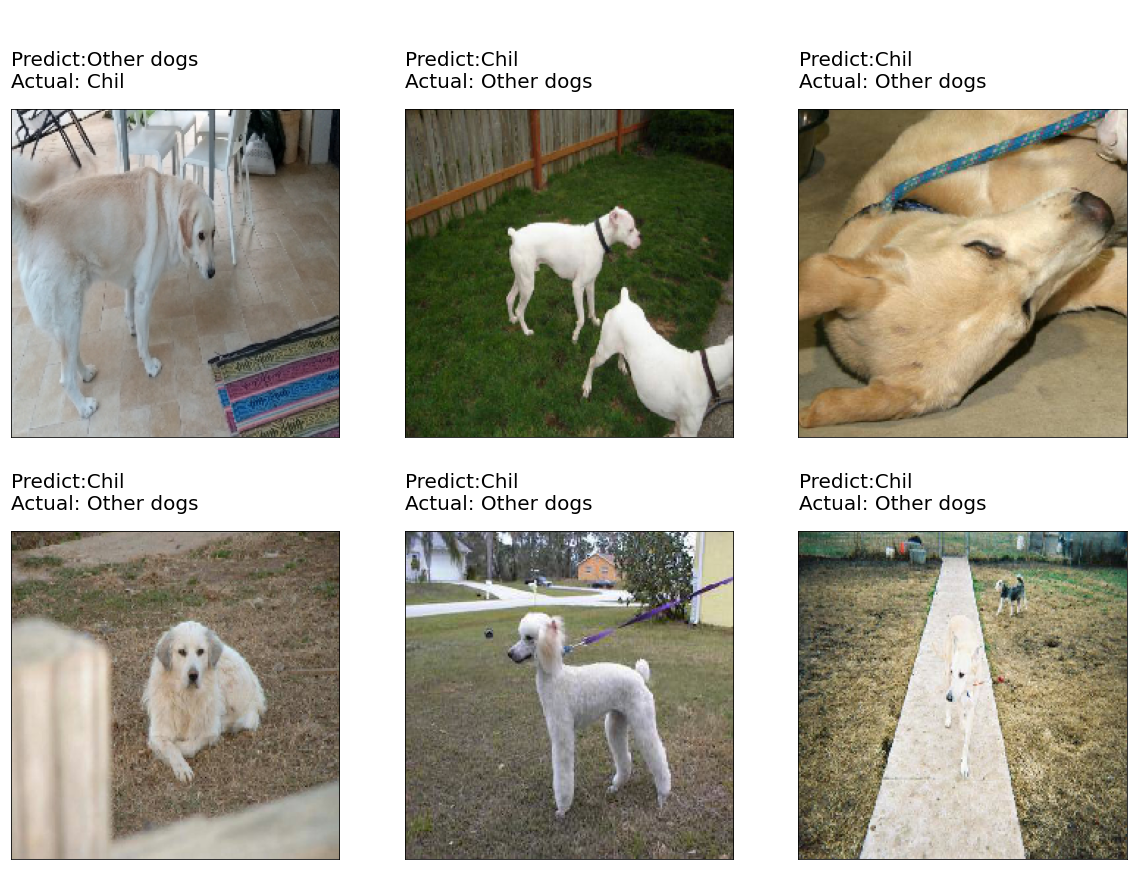

In [31]:
ProblemPic, y_pred, y_true = Ttax.TestAugmenByBatch(test_generator,TTAugmentation,model,STEP_SIZE_Test)

# Output

## Predict by 1 image


For object detection (in this case, it adds a box around the object and the class name above the object), use the default settings of boxes=True.

The user can also change the font scale and font thickness.

Chil
[INFO] loading model...


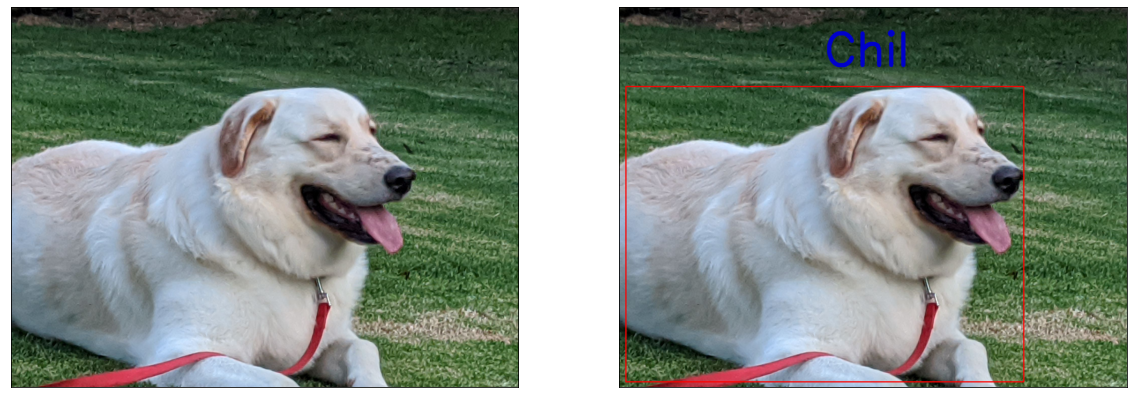

In [35]:
Path2Image='dog5.jpg'
fndobj.FindObjectIn1Pic(Path2Image,Firstmodel,model,paths,MainClass,ImagNetClasses,ClassesInModel,fontScale=6,FontThick=15)

**Segmentation** - When segmentation is needed use ColorObj=True

Chil
[INFO] loading model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.


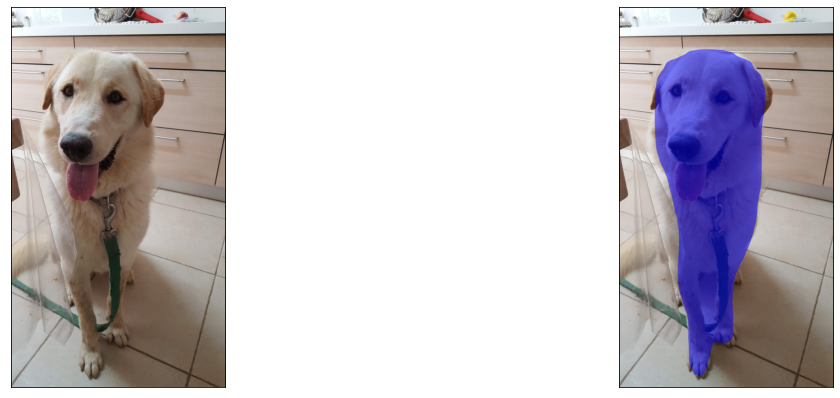

In [47]:
Path2Image='dog3.jpg'
fndobj.FindObjectIn1Pic(Path2Image,Firstmodel,model,paths,MainClass,ImagNetClasses,ClassesInModel,ColorObj=True)

## Predict by an image directory

The following code gets the **'Batch input images'** directory and sorts it to images with the specific object and without.

The results are in the **'Output'** directory.

In [ ]:
fndobj.FindObjInbatchImgs(paths['Batch input images'],Firstmodel,model,paths,MainClass,ImagNetClasses,ClassesInModel,fontScale=2,FontThick=4)

## Predict by a directory of videos

The following code gets the **'Video input'** directory and sorts it to videos with the specific object and without.

The results are in the **'Output'** directory.

The videos can also include **boxing** that follows the object. Use the following parameter:

 **TypeOfVideo='SSD'**

 
The videos may include **segmentation** that colors the object. Use the following parameter:

 **TypeOfVideo='Segmentation'**


In [ ]:
ImprtntClss='Chil'
fndobj.FindObjInVideoDirectory(paths['Video input'],Firstmodel,model,ImagNetClasses,ClassesInModel,ImprtntClss,MainClass,paths,TypeOfVideo='SSD')

[INFO] loading model...
Number 0f frames for 20210109_112038.mp4: 392. Extracting every 10 frames.
Number 0f frames for 20210109_113448.mp4: 436. Extracting every 10 frames.
Number 0f frames for PXL_20210104_131626928.mp4: 574. Extracting every 10 frames.


# Reference

*   [pixellib](https://pixellib.readthedocs.io/en/latest/) - image and video segmentation
*   [SSD and MobileNet](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/) - Add boxes to a specific classes
*   [Keras RetinaNet](https://github.com/fizyr/keras-retinanet)
*   [DeepLab: Deep Labelling for Semantic Image Segmentation](https://github.com/tensorflow/models/blob/master/research/deeplab/README.md)

*   [TTA-Test time augmentation](https://machinelearningmastery.com/how-to-use-test-time-augmentation-to-improve-model-performance-for-image-classification/)


